In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import json
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import string
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ChongSiauWei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
users = []
with open('yelp_academic_dataset_review.json',encoding="utf-8") as fl:
    for i, line in enumerate(fl):
        users.append(json.loads(line))
        #if i+1 >= 100000:
            #break
rev = pd.DataFrame(users)
rev.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [3]:
rev.shape
print(rev.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_id    object 
 1   user_id      object 
 2   business_id  object 
 3   stars        float64
 4   useful       int64  
 5   funny        int64  
 6   cool         int64  
 7   text         object 
 8   date         object 
dtypes: float64(1), int64(3), object(5)
memory usage: 480.0+ MB
None


In [4]:
reviews = rev.drop(['date','business_id','review_id','user_id','useful','funny','cool'], axis =1)

In [5]:
reviews['text length'] = rev['text'].apply(len)
reviews.head()

,stars,text,text length
0,3.0,"If you decide to eat here, just be aware it is...",513
1,5.0,I've taken a lot of spin classes over the year...,829
2,3.0,Family diner. Had the buffet. Eclectic assortm...,339
3,5.0,"Wow! Yummy, different, delicious. Our favo...",243
4,4.0,Cute interior and owner (?) gave us tour of up...,534


In [6]:
reviews.isnull().any().any()

False

Text(0, 0.5, 'count')

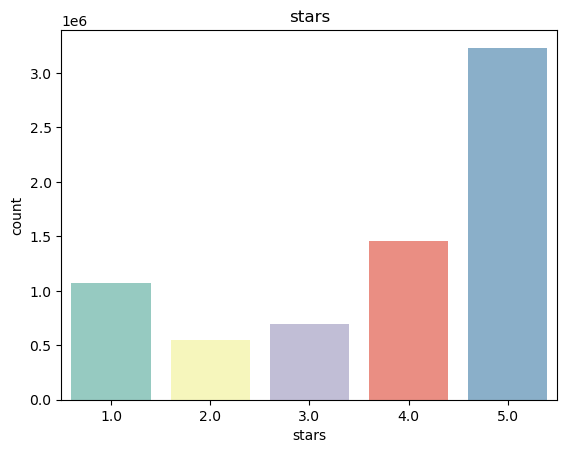

In [7]:
cplot = sns.countplot(x='stars', data=reviews, palette="Set3")
cplot.set_title('stars')
cplot.set_ylabel('count')

C:\Users\ChongSiauWei\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Text Length Distribution')

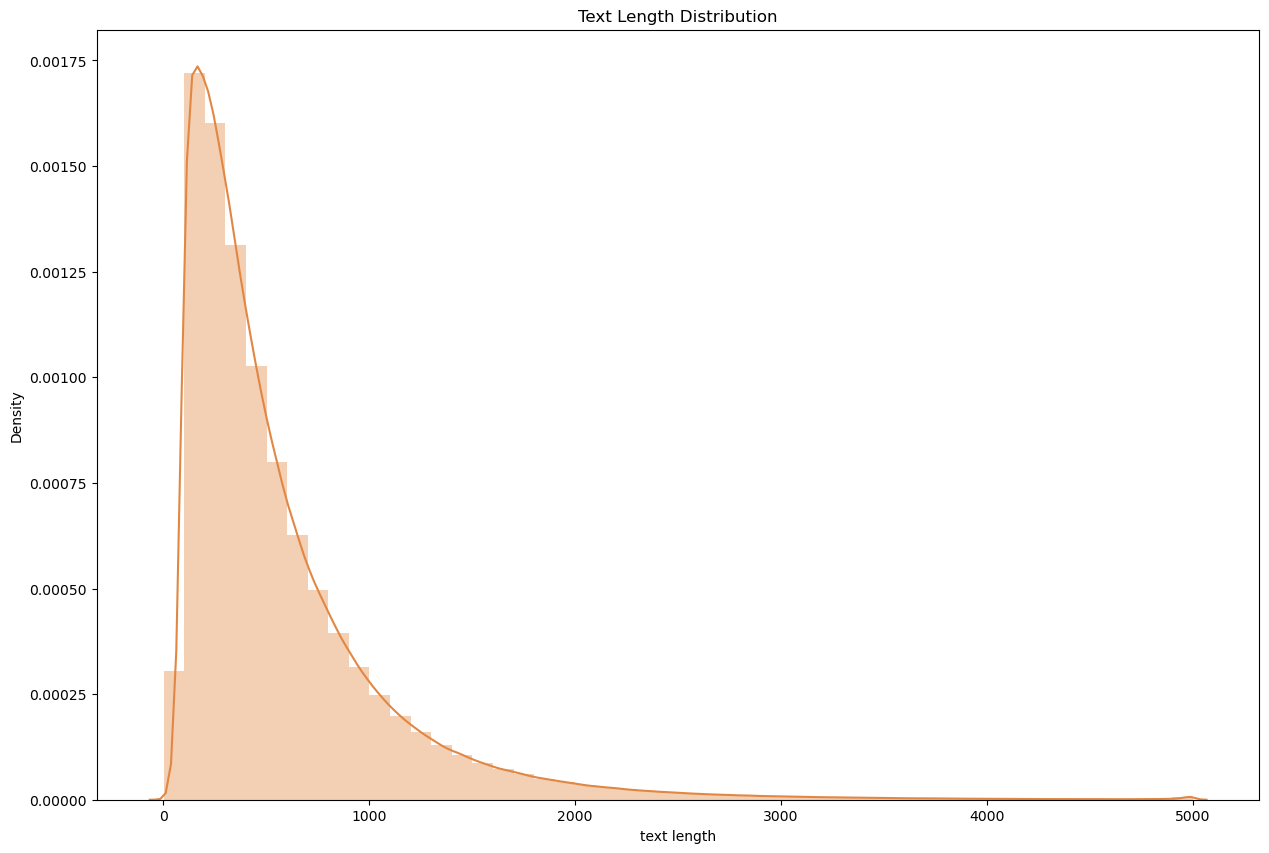

In [8]:
fig = plt.figure(figsize=(15,10))
sns.distplot(reviews['text length'], kde=True, bins=50, color='#e28743')
plt.title('Text Length Distribution')

In [9]:
text = reviews[['stars','text']]
text.head()

,stars,text
0,3.0,"If you decide to eat here, just be aware it is..."
1,5.0,I've taken a lot of spin classes over the year...
2,3.0,Family diner. Had the buffet. Eclectic assortm...
3,5.0,"Wow! Yummy, different, delicious. Our favo..."
4,4.0,Cute interior and owner (?) gave us tour of up...


In [10]:
cachedStopWords = stopwords.words("english")

def remove_punc_stopword(text):

    remove_punc = [word for word in text.lower() if word not in string.punctuation]
    remove_punc = ''.join(remove_punc)
    return [word for word in remove_punc.split() if word not in cachedStopWords]


def function_clean(text):
    text = re.sub(r"http\S+", "", text) #removing the URL Http
    # Removal of mentions
    text = re.sub("@[^\s]*", "", text)
    # Removal of hashtags
    text = re.sub("#[^\s]*", "", text)
    # Removal of numbers
    text = re.sub('[0-9]*[+-:]*[0-9]+', '', text)
    text = re.sub("'s", "", text)   
    return text

In [11]:
text['text'] = text['text'].apply(function_clean)
cleaned_text = text.copy()
cleaned_text['text'] = text['text'].apply(remove_punc_stopword)
cleaned_text['text'] = cleaned_text['text'].apply(lambda x: str(x).replace("[", "").replace("]", ""))
cleaned_text.head()

C:\Users\ChongSiauWei\AppData\Local\Temp\ipykernel_14916\231812773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['text'] = text['text'].apply(function_clean)


,stars,text
0,3.0,"'decide', 'eat', 'aware', 'going', 'take', 'ho..."
1,5.0,"'ive', 'taken', 'lot', 'spin', 'classes', 'yea..."
2,3.0,"'family', 'diner', 'buffet', 'eclectic', 'asso..."
3,5.0,"'wow', 'yummy', 'different', 'delicious', 'fav..."
4,4.0,"'cute', 'interior', 'owner', 'gave', 'us', 'to..."


In [12]:
#cleaned_text.to_csv("yelp_reviews_v3.csv", index=False)

In [13]:
def plot_Freq(data):
    FreqDist(np.concatenate(data.text.reset_index(drop=True))).plot(20, cumulative=False)

In [15]:
def reviewCloud(star):
    startext = ' '.join(text[text['stars']==star]['text'])
    wordcloud = WordCloud(
        width = 3000,
        height = 2000,
        background_color = 'black',
        stopwords = STOPWORDS).generate(str(startext))

    fig = plt.figure(
        figsize = (10, 7),
        facecolor = 'k',
        edgecolor = 'c')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)

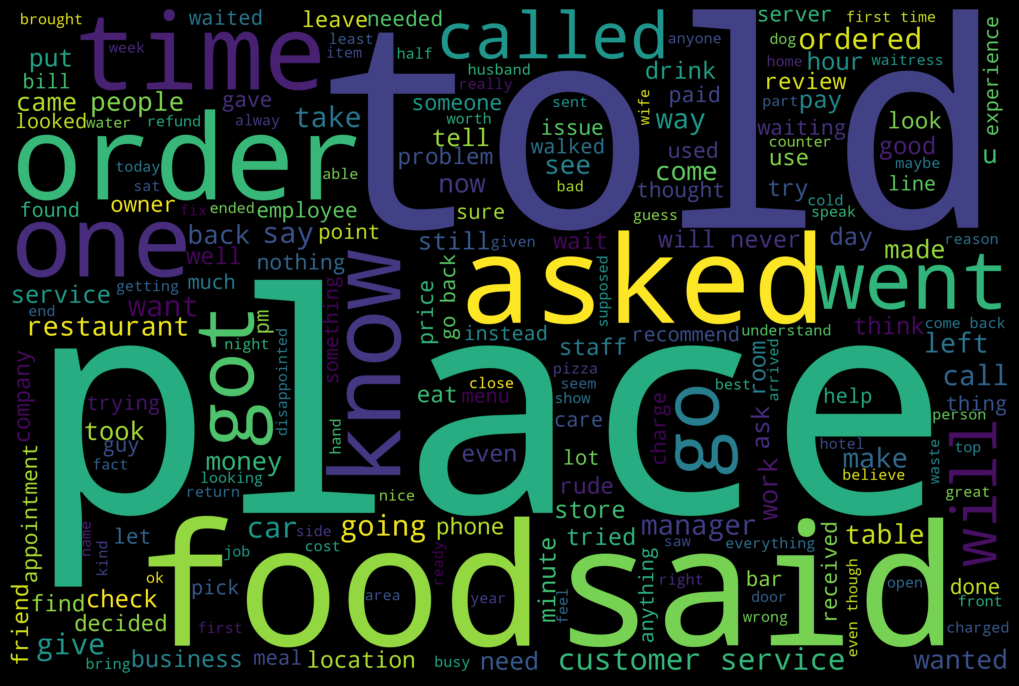

In [16]:
reviewCloud(1)

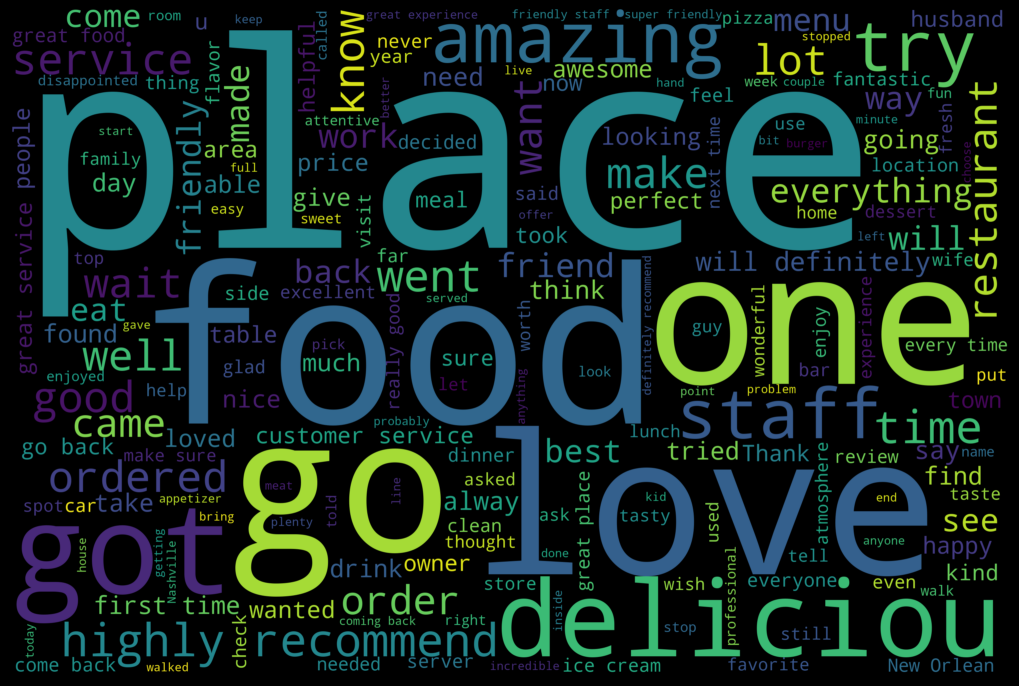

In [17]:
reviewCloud(5)